In [1]:
import os

import numpy as np

from pyaml.accelerator import Accelerator
from pyaml.common.constants import ACTION_MEASURE
from pyaml.configuration.factory import Factory
from pyaml.magnet.magnet import Magnet

In [2]:
sr = Accelerator.load("p.yaml")
# This is a fix to be able to load multiple times.
# This will be fixed after pyAML workshop
Factory.clear()
# sr.design.get_lattice().disable_6d()

30 Jan% 2026, 15:55:30 | WARNING | PyAML Tango control system binding (0.3.3) initialized with name 'live' and TANGO_HOST=localhost:11000


For the live control mode, you should have some control system emulation runing. It is possible to do 
```
apptainer pull virtual-accelerator.sif oras://gitlab-registry.synchrotron-soleil.fr/software-control-system/containers/apptainer/virtual-accelerator:latest
apptainer run virtual-accelerator.sif
```
this will run SOLEIL II proof-of-concept digital twin on localhost:11000. You can play with the digital twin itself (without pyAML) via jive to check that everything is working. You can run jive in a different terminal with 
```
apptainer pull jive.sif https://gitlab.synchrotron-soleil.fr/api/v4/projects/2739/packages/generic/jive/latest/jive.sif
apptainer run jive.sif
```
On linux you may need additionally to configure X11
```
export DISPLAY=:0
xhost +local:root
```

NOTE: This is just a demonstration of pyAML functionality. Certain things may be done stupidly. The person who wrote this jupyter notebook only cared about showing that the code is working, not about intelligently controlling the accelerator.

In [3]:
control_mode = sr.live
control_mode

TangoControlSystem(name='live', tango_host='localhost:11000', debug_level=None, lazy_devices=True, scalar_aggregator='tango.pyaml.multi_attribute', vector_aggregator=None, timeout_ms=3000)

In [4]:
chromaticity_measurement = control_mode.get_chromaticity_monitor(
    "DEFAULT_CHROMATICITY_MEASUREMENT"
)
chromaticity_measurement

ChomaticityMonitor(peer='TangoControlSystem:live', name='DEFAULT_CHROMATICITY_MEASUREMENT', lattice_names=None, betatron_tune='BETATRON_TUNE', RFfreq='RF', N_step=15, alphac=None, E_delta=0.001, Max_E_delta=0.01, N_tune_meas=3, Sleep_between_meas=2.0, Sleep_between_RFvar=2.0, fit_order=2)

In [5]:
def chroma_callback(step: int, action: int, rf: float, tune: np.array):
    if action == ACTION_MEASURE:
        print(f"Tune response measurement: #{step} RF={rf} Tune={tune}")
    return True

In [6]:
sr.design.get_lattice().disable_6d()
alphac = sr.design.get_lattice().get_mcf()
sr.design.get_lattice().enable_6d()

Tune response measurement: #0 RF=352314214.3832288 Tune=[np.float64(0.21591200203326322), np.float64(0.30739352977216233)]
Tune response measurement: #0 RF=352314214.3832288 Tune=[np.float64(0.21591200203326322), np.float64(0.30739352977216233)]
Tune response measurement: #0 RF=352314214.3832288 Tune=[np.float64(0.21591200203326322), np.float64(0.30739352977216233)]
Tune response measurement: #1 RF=352314233.2437594 Tune=[np.float64(0.21508023857147912), np.float64(0.3065452310791728)]
Tune response measurement: #1 RF=352314233.2437594 Tune=[np.float64(0.21508023857147912), np.float64(0.3065452310791728)]
Tune response measurement: #1 RF=352314233.2437594 Tune=[np.float64(0.21508023857147912), np.float64(0.3065452310791728)]
Tune response measurement: #2 RF=352314252.10429 Tune=[np.float64(0.21427228672796908), np.float64(0.3057174574006098)]
Tune response measurement: #2 RF=352314252.10429 Tune=[np.float64(0.21427228672796908), np.float64(0.3057174574006098)]
Tune response measurement

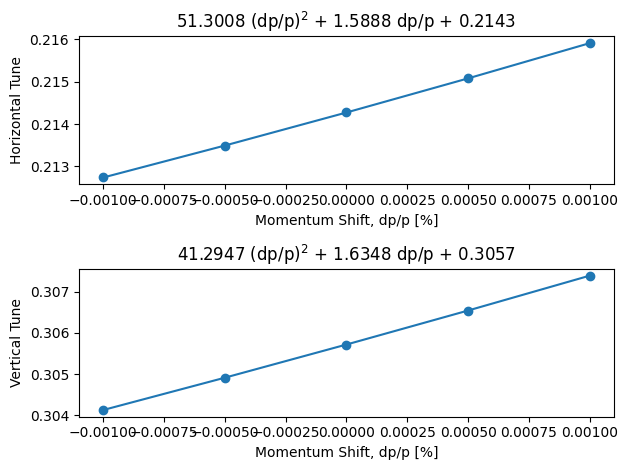

array([1.58878253, 1.63480198])

In [7]:
chromaticity_measurement.measure(
    callback=chroma_callback,
    do_plot=True,
    alphac=alphac,
    fit_order=2,
    N_step=5,
    Sleep_between_meas=2.5,
    Sleep_between_RFvar=2.5,
)